**Machine Learning Lab (PMCA507P)**

> **Reg No:** 23MCA1030

>**Name :**  Vinayak Kumar Singh

**Random Forest Classifier**

**Collab url :** https://colab.research.google.com/drive/1on_UwLL-DmtkESXxLLifEkB3qNEQ9clv?usp=sharing

**Dataset url :** https://www.kaggle.com/datasets/uciml/glass/data

Glass Classification Dataset

# Import necessary libraries

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('/content/glass.csv')

In [ ]:
df.head()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,146,86,93,27,19,5,72,0,0,0
1,81,101,62,52,68,30,11,0,0,0
2,29,81,57,66,88,26,10,0,0,0
3,84,58,71,45,60,39,33,0,0,0
4,71,62,64,40,97,37,23,0,0,0


In [ ]:
df.rename(columns={
    'RI': 'refractive_index',
    'Na': 'Sodium',
    'Mg': 'Magnesium',
    'Al': 'Aluminum',
    'Si': 'Silicon',
    'K': 'Potassium',
    'Ca': 'Calcium',
    'Ba': 'Barium',
    'Fe': 'Iron'
}, inplace=True)

df.head()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.describe()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.isnull().sum()

refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type                0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

# Encode categorical variables using LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

# Split the data into features (X) and target (y)


In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']

# Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision tree classifier

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Print decision tree classifier accuracy

In [ ]:
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy)


Decision Tree Classifier Accuracy: 0.7209302325581395


# Create Radom Forest Classifier model

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=44, criterion='entropy', max_depth=None,
                                min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=44)

# Predict and evaluate the random forest classifier

In [ ]:
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.813953488372093


# Print classification report and confusion matrix

In [ ]:
print("Classification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.79      0.73      0.76        15
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3
           5       1.00      0.78      0.88         9

    accuracy                           0.81        43
   macro avg       0.88      0.81      0.82        43
weighted avg       0.84      0.81      0.81        43

Confusion Matrix:
[[10  0  0  0  0  0]
 [ 3 11  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]


# Plot the first decision tree in the random forest

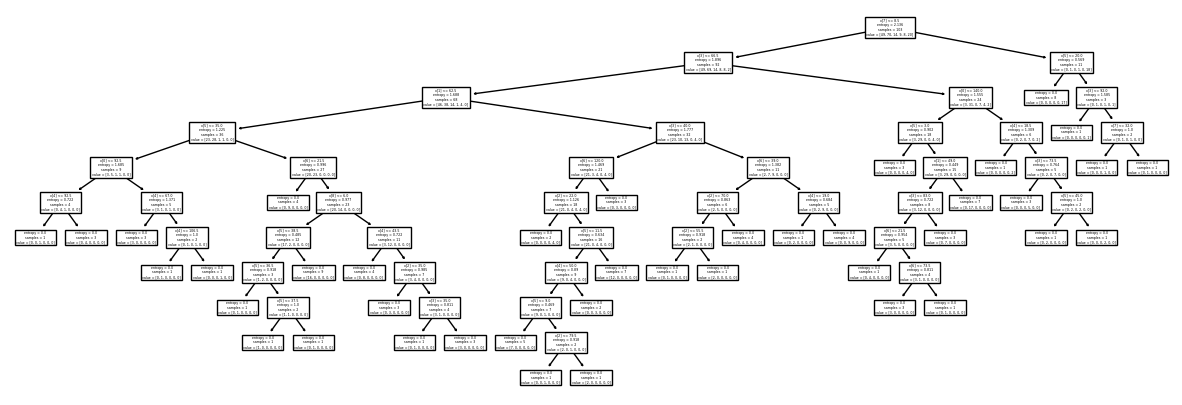

In [ ]:
plt.figure(figsize=(15, 5))
tree.plot_tree(rf_clf.estimators_[0])
plt.show()